# Static DataMapPlots

DataMapPlot is a library that can generate static plots of data maps for use in presentations, papers and posters. Its goal is to be as simple to use as possible, taking care of most of the difficult aesthetic challenges for you, while also providing enough in the way of options and flexibility to let you generate images with your own custom style. This notebook provides an introduction to static plottin in DataMapPlot by providing a quick demonstration of some of what it is capable of. Later notebooks in the documentation will step through the kind of input data you need, basic usage patterns, and some of the ways you tweak and customize the plots. To get started we will need to import DataMapPlot. Also, for the purposes of this documentation, I need to keep the image sizes smaller to fit in readthedocs; because of that I will set the global DPI for matplotlib (which DataMapPlot uses for plotting), but you should probably remove those lines if you are running this notebook yourself.

In [1]:
# Ensure we don't generate large images for inline docs
# You probably want to remove this if running the notebook yourself
import matplotlib

matplotlib.rcParams["figure.dpi"] = 72

import datamapplot

To demonstrate what DataMapPlot can do we'll need some data. The examples directory of the DataMapPlot repository contains some pre-prepared datasets for experimenting with. We'll grab one of those. In practice we need a data map -- as set of 2d coordinates, one per data sample we are mapping -- and a set of labels idenityfing the "topic" of a data sample, usually based on clusters in the data map. In this case we'll use data from the titles and abstracts of papers from the machine learning section of the [ArXiv preprint server](https://arxiv.org/).

In [2]:
import numpy as np
import requests
import io

data_map_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/arxiv_ml_data_map.npy"
)
arxivml_data_map = np.load(io.BytesIO(data_map_file.content))
label_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/arxiv_ml_simplified_cluster_labels.npy"
)
arxivml_labels = np.load(io.BytesIO(label_file.content), allow_pickle=True)

With just the data map and per point labels we can already generate an attractive plot, mapping our the landscape of machine learning research available on ArXiv.

(<Figure size 864x864 with 1 Axes>, <Axes: >)

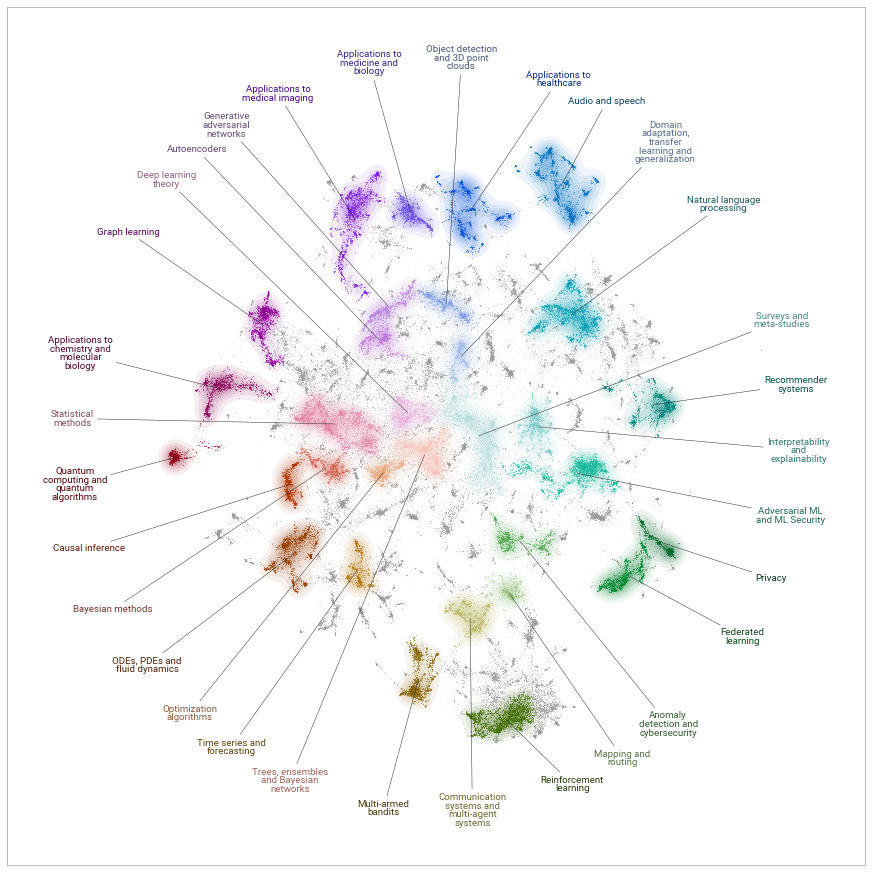

In [3]:
datamapplot.create_plot(arxivml_data_map, arxivml_labels)

This is just a small set of labels however, covering only the larger clusters. Let's get a more detailed label set and try to pack more labels into our plot (quite a challenge!). But let's go further and try to customise the plot a little. We can grab the [ArXiv logo](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/ArXiv_logo_2022.svg) from wikimedia and use it as a logo for the plot (you can, of course, substitute your institutions logo for your plots).

In [4]:
import PIL

label_file = requests.get(
    "https://github.com/TutteInstitute/datamapplot/raw/main/examples/arxiv_ml_cluster_labels.npy"
)
more_arxivml_labels = np.load(io.BytesIO(label_file.content), allow_pickle=True)
arxiv_logo_response = requests.get(
    "https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/ArXiv_logo_2022.svg/320px-ArXiv_logo_2022.svg.png",
    stream=True,
    headers={"User-Agent": "My User Agent 1.0"},
)
arxiv_logo = np.asarray(PIL.Image.open(arxiv_logo_response.raw))

For our first major plot let's stay with something akin to what we had, but with more labels. We'll add the ArXiv logo we loaded, and we'll add a title and sub-title to let people know what the plot is about. Since we have so many topic labels now it might also be worth highlighting a few that might be of interest. My own research tends to overlap with clustering, manifold learning, topic modelling, and active learning, so I might want to highlight those labels as potential regions of interest. We can also customize how the plot does that highlighting -- making the text larger, in bold, and with circular bounding box around the text. Put that all together and we get the following:

(<Figure size 864x864 with 1 Axes>,
 <Axes: title={'left': 'A data map of papers from the Machine Learning section of ArXiv'}>)

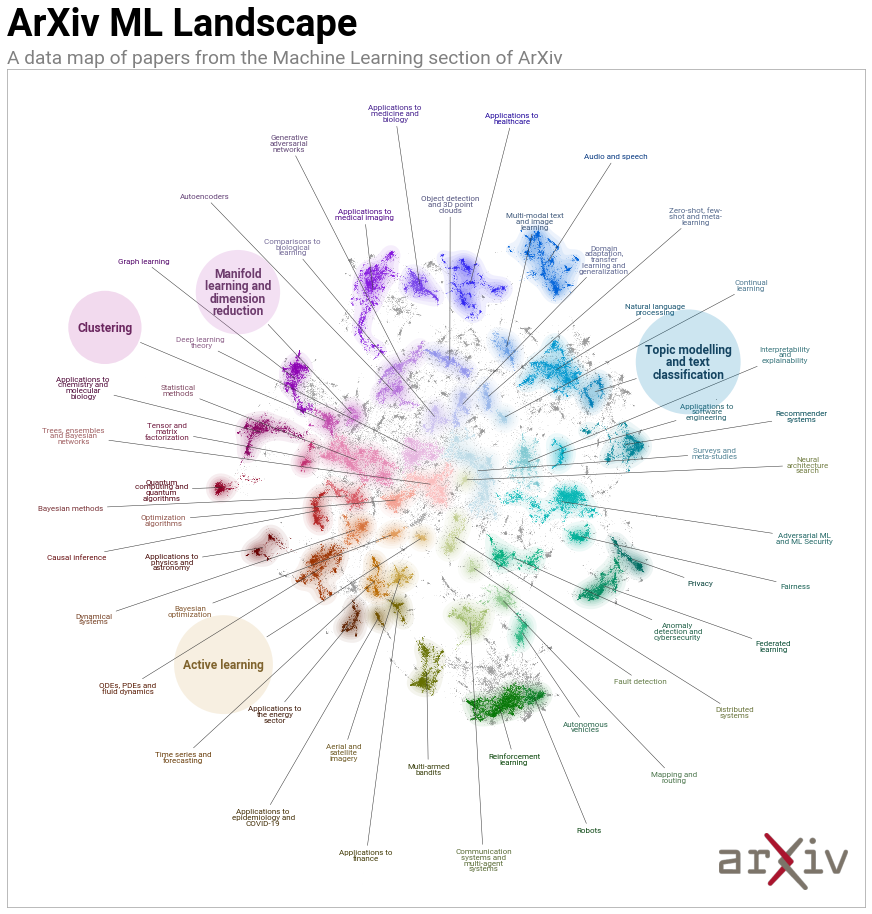

In [5]:
datamapplot.create_plot(
    arxivml_data_map,
    more_arxivml_labels,
    title="ArXiv ML Landscape",
    sub_title="A data map of papers from the Machine Learning section of ArXiv",
    highlight_labels=[
        "Clustering",
        "Manifold learning and dimension reduction",
        "Active learning",
        "Topic modelling and text classification",
    ],
    label_font_size=8,
    highlight_label_keywords={
        "fontsize": 12,
        "fontweight": "bold",
        "bbox": {"boxstyle": "circle", "pad": 0.75},
    },
    logo=arxiv_logo,
)

That's a pretty good looking result with very little work involved! You can adjust the options yourself if you are running this notebook and see how easy it is -- perhaps highlight a few different topics that are of interest to you -- and still have the layout handled for you.

What if we want the labels over top of the plot itself so we have something more resembling a word-cloud, just with the locations of the words in the cloud having soem meaning. We can do that as well! We simple ask for ``label_over_points`` and allow for ``dynamic_label_size`` to size the labels by cluster size to make it more work-cloud-like.

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


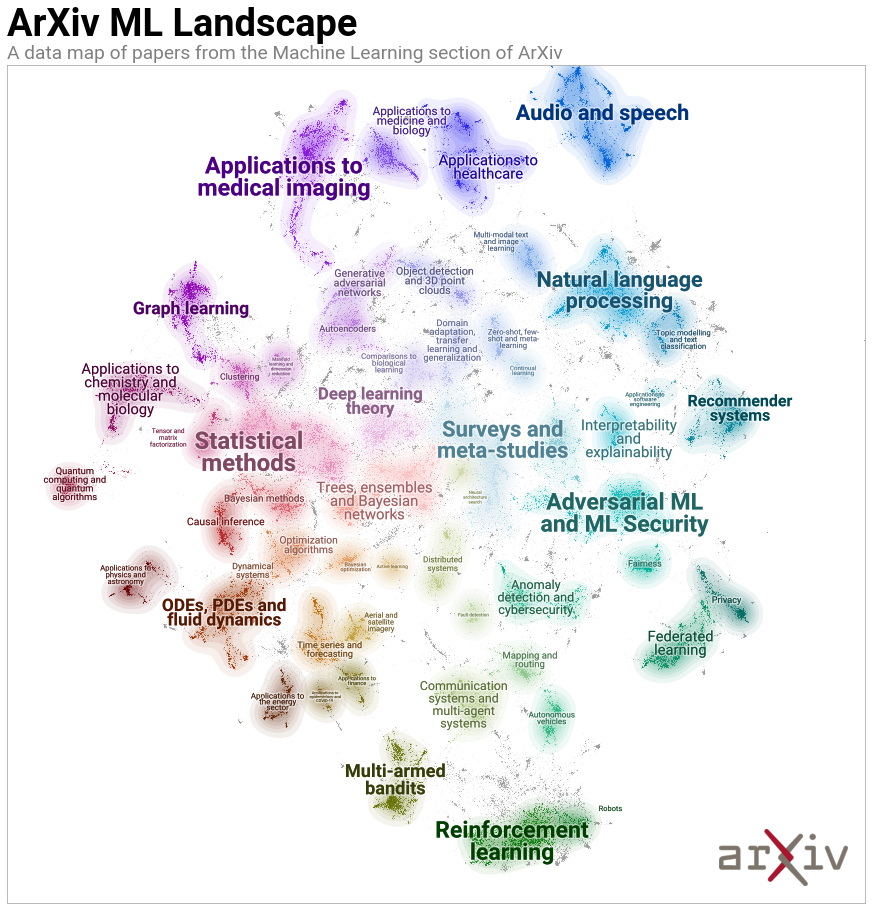

In [6]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    more_arxivml_labels,
    title="ArXiv ML Landscape",
    sub_title="A data map of papers from the Machine Learning section of ArXiv",
    label_over_points=True,
    dynamic_label_size=True,
    logo=arxiv_logo,
)

While a very different plot, that is still very much in line with the basic aesthetic that we started with. What if we want to make something a little more different? Perhaps some custom fonts might help. Fortunately datamapplot will recognise any fonts from Google fonts and download and use them when asked. So let's try something fancy like "Playfair Display SC".

Now that we have a more interesting font, let's use that for the text. Because this font is more compact we will also have to tweak the linespacing a little, and allow the labels to be a little more tightly packed in general. We can also adjust the actual title, making is use the extra-bold version of the same font, and make it much larger. Finally let's turn on darkmode.

(<Figure size 864x864 with 1 Axes>,
 <Axes: title={'left': 'A data map of papers from the Machine Learning section of ArXiv'}>)

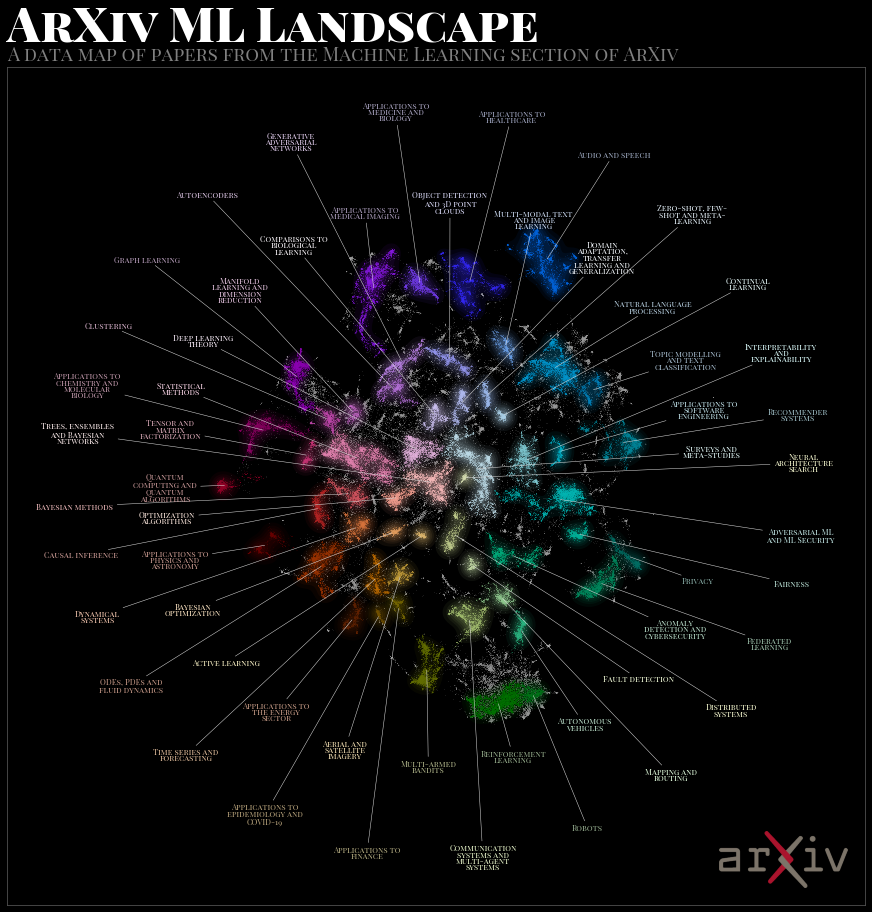

In [7]:
datamapplot.create_plot(
    arxivml_data_map,
    more_arxivml_labels,
    title="ArXiv ML Landscape",
    sub_title="A data map of papers from the Machine Learning section of ArXiv",
    logo=arxiv_logo,
    font_family="Playfair Display SC",
    label_linespacing=1.25,
    label_font_size=8,
    title_keywords={"fontsize": 48, "fontfamily": "Playfair Display SC Black"},
    label_margin_factor=1.0,
    darkmode=True,
)

A different look, but very striking, and definitely suitable for inclusion in a presentation for example.

We are still in the same general aesthetic however. How far can we push things? Let's use a script font from google fonts ...

And while we are here let's build a custom cmap for the clusters,and let DataMapPlot generate one for us based on that cmap.

In [8]:
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(
    matplotlib.cm.gist_earth(np.linspace(0, 1, 384))[64:320], "subset_of_gist_earth"
)

And now we can throw all of that into the mix. Since we are about to go a little crazy we'll use the simpler label set. We'll use the script font, along with the ligatures it has. We can change the arrow style -- instead of nice straight lines let's have arcing arrows swirling about the center. We can apply our new color mapping and also change the colour used for unclustered points. While we are at it let's change how the points are rendered, with larger points and relying on alpha channels to give a sense of the density. And since the result is a matplotlib figure (and the axis contained in it) we can apply any fuirther matplotlib commands directly to that. In this case let's change the background colour of the axis itself.

[None]

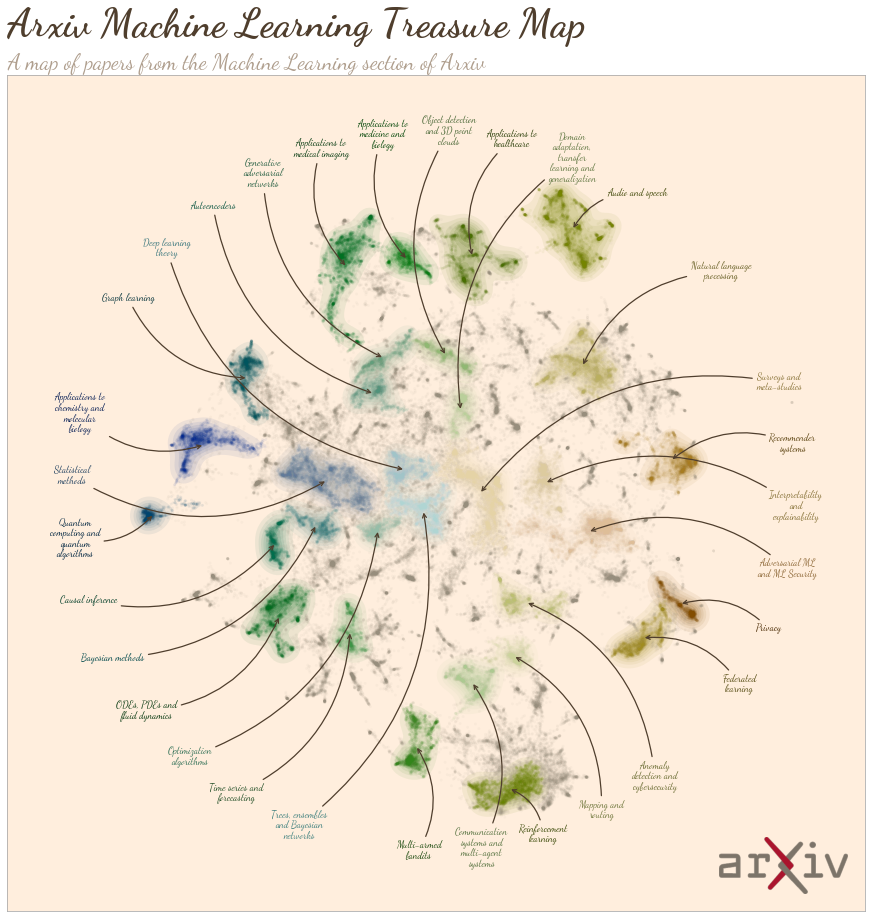

In [9]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    title="Arxiv Machine Learning Treasure Map",
    sub_title="A map of papers from the Machine Learning section of Arxiv",
    logo=arxiv_logo,
    font_family="Dancing Script",
    arrowprops={
        "arrowstyle": "->",
        "connectionstyle": "arc3,rad=0.3",
        "linewidth": 1.25,
        "ec": "#4f3e2d",
    },
    noise_color="#978e7d",
    cmap=custom_cmap,
    label_margin_factor=1.0,
    force_matplotlib=True,
    marker_type="o",
    point_size=8,
    alpha=0.05,
    title_keywords={"color": "#4f3e2d", "fontsize": 40},
    sub_title_keywords={"color": "#af9e8d", "fontsize": 22},
)
ax.set(fc="#ffeedd")

Or perhaps we can go back to labels over points ...

  0%|          | 0/500 [00:00<?, ?it/s]

Resetting positions to accord with alignment


[None]

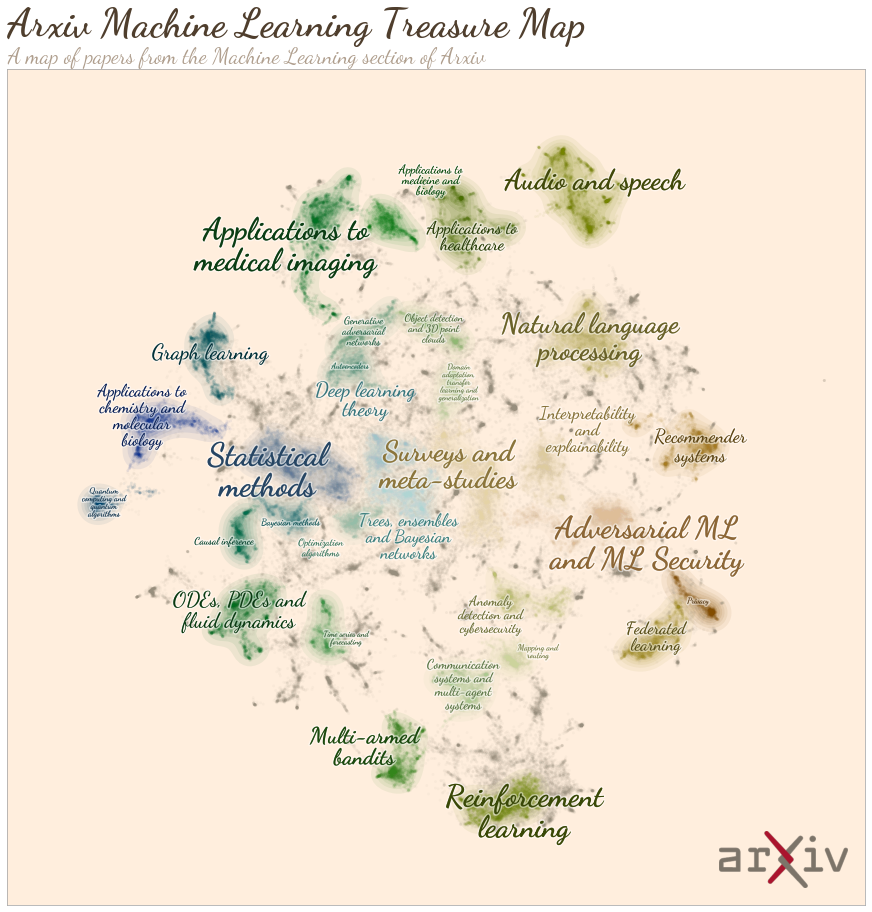

In [10]:
fig, ax = datamapplot.create_plot(
    arxivml_data_map,
    arxivml_labels,
    title="Arxiv Machine Learning Treasure Map",
    sub_title="A map of papers from the Machine Learning section of Arxiv",
    logo=arxiv_logo,
    font_family="Dancing Script",
    label_over_points=True,
    dynamic_label_size=True,
    max_font_size=32,
    min_font_size=8,
    noise_color="#978e7d",
    cmap=custom_cmap,
    force_matplotlib=True,
    marker_type="o",
    point_size=8,
    alpha=0.05,
    title_keywords={"color": "#4f3e2d", "fontsize": 40},
    sub_title_keywords={"color": "#af9e8d", "fontsize": 22},
)
ax.set(fc="#ffeedd")

Definitely different! This would not be my first choice for how to present this data, but it does give some idea of some of the many directions we can go in customising the output of DataMapPlot to suit your needs. Hopefully this has been inspiring. You can read more details about how to use DataMapPlot and how to make these kinds of customisations in the later notebooks.